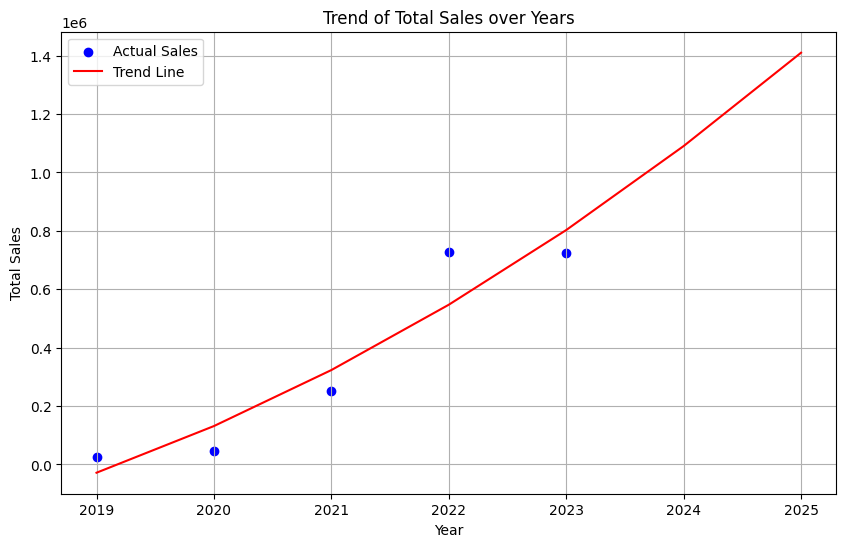

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Load the data
sales_data = pd.read_csv(r"C:\Users\hp\Desktop\Jupyter Notebook\Capston project EV new\EV_sales_final_data (1).csv")
sentiment_data = pd.read_excel(r"C:\Users\hp\Desktop\Jupyter Notebook\Capston project EV new\sentiment_scores_combined.xlsx")

# Calculate average compound score and sum of total sales for each year
avg_compound_score = sentiment_data.groupby('Year')['Compound Score'].mean()
sum_total_sales = sales_data.groupby('Year')['Total'].sum()

# Convert to DataFrame
data = pd.DataFrame({'Avg Compound Score': avg_compound_score, 'Total Sales': sum_total_sales}).reset_index()

# Extract numeric years
data['Year'] = data['Year'].str.extract(r'(\d+)').astype(int)

# Prepare data for polynomial regression
X = data['Year'].values.reshape(-1, 1)  # Year
y = data['Total Sales'].values.reshape(-1, 1)  # Sales

# Fit polynomial regression model
degree = 2  # or choose an appropriate degree
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

# Predictions for upcoming years
future_years = np.arange(2019, 2026).reshape(-1, 1)
future_years_poly = poly_features.transform(future_years)
sales_pred = model.predict(future_years_poly)

# Plot the data and trend line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Sales')
plt.plot(future_years, sales_pred, color='red', label='Trend Line')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Trend of Total Sales over Years')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
next_year_sentiment_score = 0.8  # Replace with the sentiment score for the next year
next_year_sales_pred = model.predict(poly_features.transform([[next_year_sentiment_score]]))
print("Predicted sales for the next year:", next_year_sales_pred[0][0])

Predicted sales for the next year: 64821872304.99332
